In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import itertools
import re
from sklearn import linear_model

In [2]:
if not os.path.exists("../data/prep/500.csv"):
    print("Missing dataset file")
else:
    print("Success!")

Success!


In [3]:
df=pd.read_csv('../data/prep/500.csv')

In [4]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=' '
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# **Developer Analysis**

In [24]:
df['developer']=df['developer'].str.strip()

In [40]:
data = df.groupby(['developer']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
data=data.reset_index()
data.columns = ['Developer','Global Sales']

data1 = df.groupby(['developer']).count().iloc[:,0]
data1=data1.reset_index()
data1.columns = ['Developer','Releases']

data2 = df.groupby(['developer']).sum()['meta_critic_score']
data2 = pd.DataFrame(data2.sort_values(ascending=False))
data2=data2.reset_index()
data2.columns = ['Developer','Critic Rating']

data3 = df.groupby(['developer']).sum()['meta_user_score']
data3 = pd.DataFrame(data3.sort_values(ascending=False))
data3=data3.reset_index()
data3.columns = ['Developer','User Rating']

final_data = pd.merge(left=data, right=data1, how='left', left_on='Developer', right_on='Developer')
final_data = pd.merge(left=final_data, right=data2, how='left', left_on='Developer', right_on='Developer')
final_data = pd.merge(left=final_data, right=data3, how='left', left_on='Developer', right_on='Developer')

final_data['Sales Per Release']= final_data['Global Sales'] / final_data['Releases']
final_data['Average Critic Rating']= round(final_data['Critic Rating'] / final_data['Releases'],1)
final_data['Average User Rating']= round(final_data['User Rating'] / final_data['Releases'],1)
final_data=final_data.set_index('Developer')
final_data.head()

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating
Developer,,,,,,,
EA Canada,175920000.0,190,14594,1286.1,9.258947e+05,76.8,6.8
Ubisoft Montreal,157670000.0,133,9730,930.2,1.185489e+06,73.2,7.0
Traveller's Tales,133840000.0,134,9568,971.6,9.988060e+05,71.4,7.3
EA Tiburon,127010000.0,133,10156,871.6,9.549624e+05,76.4,6.6
Rockstar North,106630000.0,14,1255,113.9,7.616429e+06,89.6,8.1


In [41]:
replace_dict = {
        'very bad': 30, 
        'bad': 45, 
        'ok': 60, 
        'good': 75, 
        'very good': 85, 
        'excellent': 100, 
}
final_data['rating'] = pd.cut(final_data['Average Critic Rating'],
                      bins=[1]+list(replace_dict.values()),
                      labels=list(replace_dict.keys()))

In [42]:
final_data.to_csv('../data/analysis/developer.csv')

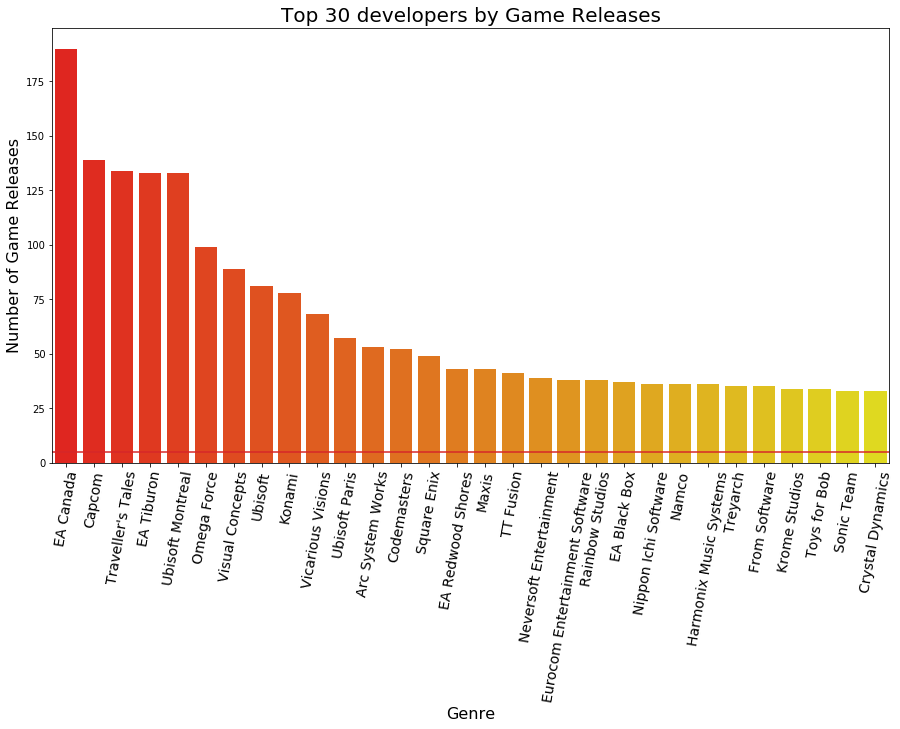

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating,rating
Developer,,,,,,,,
EA Canada,175920000.0,190,14594,1286.1,9.258947e+05,76.8,6.8,very good
Capcom,62640000.0,139,10279,1069.3,4.506475e+05,73.9,7.7,good
Traveller's Tales,133840000.0,134,9568,971.6,9.988060e+05,71.4,7.3,good
EA Tiburon,127010000.0,133,10156,871.6,9.549624e+05,76.4,6.6,very good
Ubisoft Montreal,157670000.0,133,9730,930.2,1.185489e+06,73.2,7.0,good
Omega Force,27180000.0,99,6327,735.8,2.745455e+05,63.9,7.4,good
Visual Concepts,63610000.0,89,6853,578.8,7.147191e+05,77.0,6.5,very good
Ubisoft,46190000.0,81,5437,554.6,5.702469e+05,67.1,6.8,good
Konami,35650000.0,78,5260,557.6,4.570513e+05,67.4,7.1,good


In [51]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(final_data.sort_values(by='Releases',ascending=False))
data=data[:30]

colors = sns.color_palette("autumn", len(data))
ax = sns.barplot(y = 'Releases' , x = data.index, data=data, palette=colors)
ax.set_ylabel(ylabel='Number of Game Releases', fontsize=16)
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_title(label='Top 30 developers by Game Releases', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=80)
mean=final_data['Releases'].mean()
ax.axhline(mean,color='tab:red')

plt.show();
data

This graph shows the 30 developers that have produced the most releases. As you can see all 30 of these developers have produced far more games than the average developer. There is exponential decay present here. Few studios\developers have produced an extrmemely high number of games, and then quickly they fall.


# <font color='red'> **Developer V Sales** </font> 

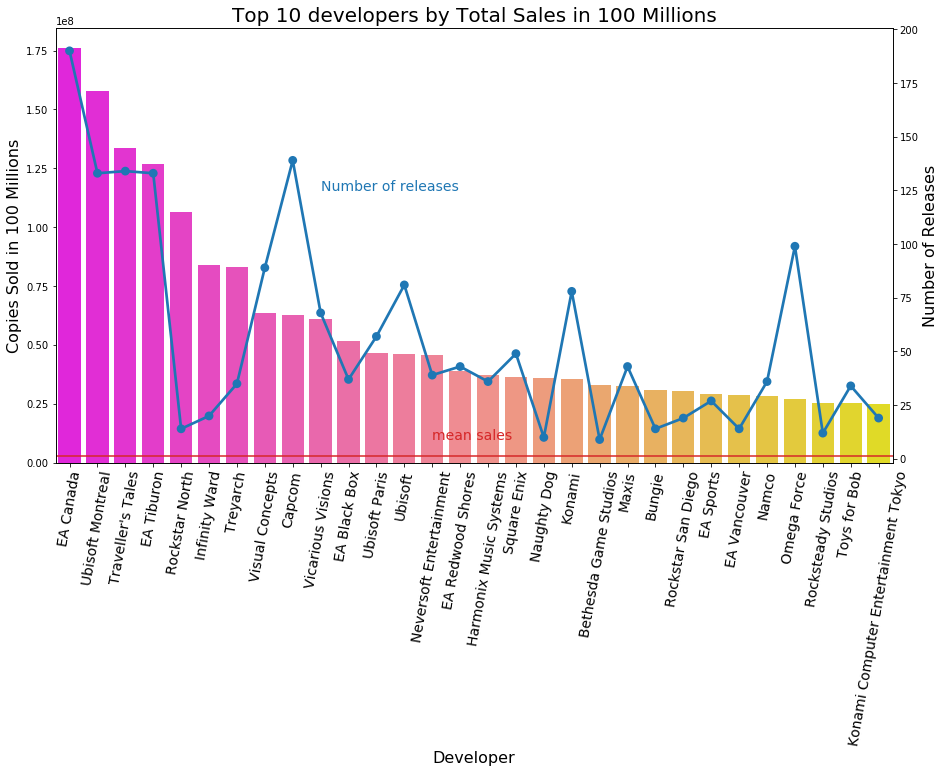

In [60]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(final_data.sort_values(by='Global Sales',ascending=False))
data=data[:30]
colors = sns.color_palette("spring", len(data))
ax = sns.barplot(y = 'Global Sales' , x = data.index, data=data, palette=colors)
ax.set_ylabel(ylabel='Copies Sold in 100 Millions', fontsize=16)
ax.set_xlabel(xlabel='Developer', fontsize=16)
ax.set_title(label='Top 10 developers by Total Sales in 100 Millions', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=80)
mean=final_data['Global Sales'].mean()
ax.axhline(mean,color='tab:red')
ax.text(13, 10000000, 'mean sales', color='tab:red',fontsize=14)

#allow multiple axis on same plot
ax2 = ax.twinx()
ax2 = sns.pointplot(y = 'Releases' , x =data.index, data=data)
ax2.set_ylabel(ylabel='Number of Releases', fontsize=16)
ax2.text(9, 125, 'Number of releases', color='tab:blue',fontsize=14)

plt.show();

This graph shows the number of units sold by the top 30 developers. The point plot shows the number of games each developer has released. The red line at the bottom shows the mean number of units sold for the whole dataset. These top 10 developers are well above the average. As you can see EA Canada have the highest number of sales. Other developers like Rockstar North have a very high amount of units sold compared to its number of releases. It seems unfair to judge developers just on their overall number of sales as some developers have produce a substantial amount more releases. Now I want to look at what developers get the most sales per release to get a better view of which developers produce better games.
Again, there is exponential decay present here. Few studios\developers do well, and then quickly they fall. What is interesting is that several EA subdivisions are listed independently, if they get combined (Like EA Sports, EA Canada..etc), Electronic Arts would become the top developer.

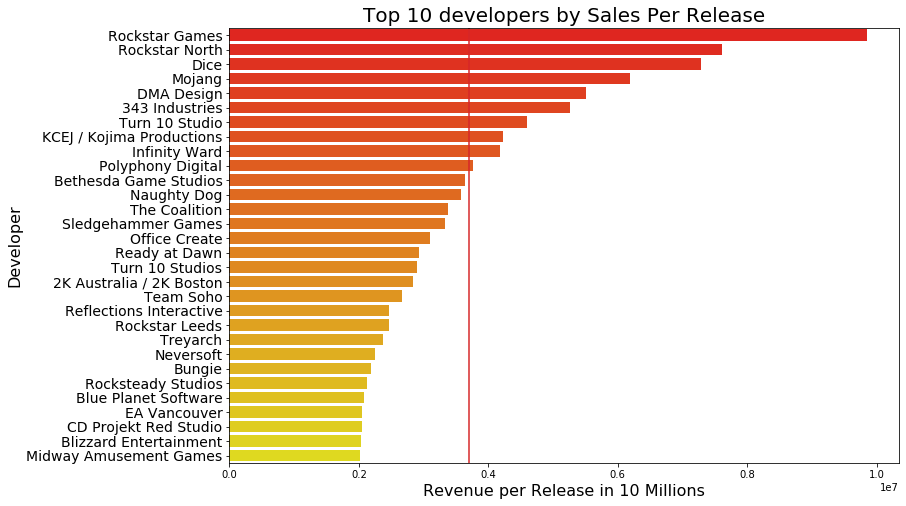

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating,rating
Developer,,,,,,,,
Rockstar Games,19710000.0,2,194,15.8,9.855000e+06,97.0,7.9,excellent
Rockstar North,106630000.0,14,1255,113.9,7.616429e+06,89.6,8.1,excellent
Dice,14560000.0,2,169,15.0,7.280000e+06,84.5,7.5,very good
Mojang,12380000.0,2,175,13.2,6.190000e+06,87.5,6.6,excellent
DMA Design,16530000.0,3,260,24.6,5.510000e+06,86.7,8.2,excellent
343 Industries,15810000.0,3,254,22.7,5.270000e+06,84.7,7.6,very good
Turn 10 Studio,4600000.0,1,91,8.2,4.600000e+06,91.0,8.2,excellent
KCEJ / Kojima Productions,4230000.0,1,91,9.1,4.230000e+06,91.0,9.1,excellent
Infinity Ward,83770000.0,20,1578,102.4,4.188500e+06,78.9,5.1,very good


In [47]:
data = final_data.sort_values(by='Sales Per Release',ascending=False)
data=data[:30]
genres = data.index

colors = sns.color_palette("autumn", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Sales Per Release', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Release in 10 Millions', fontsize=16)
ax.set_ylabel(ylabel='Developer', fontsize=16)
ax.set_title(label='Top 10 developers by Sales Per Release', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)

mean=data['Sales Per Release'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();
data

This graph shows the developers that get the most units sold per release. The green point plot shows each of the developers average critic score. As you can see theres is a relative correlation between these two. This makes sense as developers that get more sales per release should also produce better games in terms of ratings. The red bar shows the mean number of sales per releases of the ehole dataset. Looking at these two graphs I asked myself the question, is it better to release a large amount of games or produce a fewer amount of better quality.

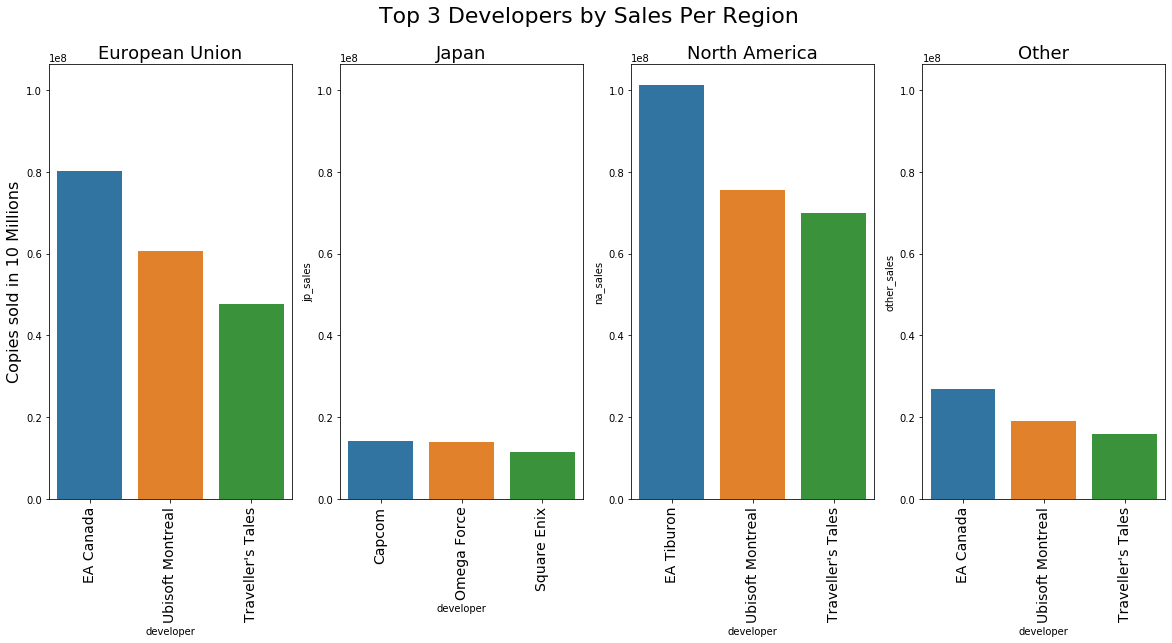

,eu_sales
developer,
EA Canada,80120000
Ubisoft Montreal,60660000
Traveller's Tales,47640000
,jp_sales
developer,
Capcom,14220000
Omega Force,13920000
Square Enix,11460000
,na_sales


In [31]:
EU = df.pivot_table('eu_sales', columns='developer', aggfunc='sum').T
EU = EU.sort_values(by='eu_sales', ascending=False).iloc[:3]
EU_genres = EU.index

JP = df.pivot_table('jp_sales', columns='developer', aggfunc='sum').T
JP = JP.sort_values(by='jp_sales', ascending=False).iloc[:3]
JP_genres = JP.index

NA = df.pivot_table("na_sales", columns='developer', aggfunc='sum').T
NA = NA.sort_values(by="na_sales", ascending=False).iloc[:3]
NA_genres = NA.index

Other = df.pivot_table('other_sales', columns='developer', aggfunc='sum').T
Other = Other.sort_values(by='other_sales', ascending=False).iloc[:3]
Other_genres = Other.index

#colors =  {'Action':"orchid", 'Sports':"mediumslateblue", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue","Fighting":'Orange'}
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
sns.barplot(x=EU_genres, y=EU["eu_sales"])
plt.title('European Union', size=18)
plt.ylabel('Copies sold in 10 Millions', size=16)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)


sns.barplot(x=JP_genres, y=JP['jp_sales'])
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)


sns.barplot(x=NA_genres, y=NA['na_sales'])
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)


sns.barplot(x=Other_genres, y=Other['other_sales'])
plt.title('Other', size=18)
plt.suptitle('Top 3 Developers by Sales Per Region', size=22)
plt.show();
display_side_by_side(EU,JP,NA,Other)

The above plot shows 4 different bar graphs. Each graph shows the number of copies sold by each regions top 3 developer as bars with the axis on the left
I thought that it was interesting that the top 3 developers were the same for all the regions except for Japan. The top 3 developers in Japan are all Japanese companies. This may be because the Japanese people like to promote Japanese companies.


# <font color='red'> **Genre V Ratings** </font> 

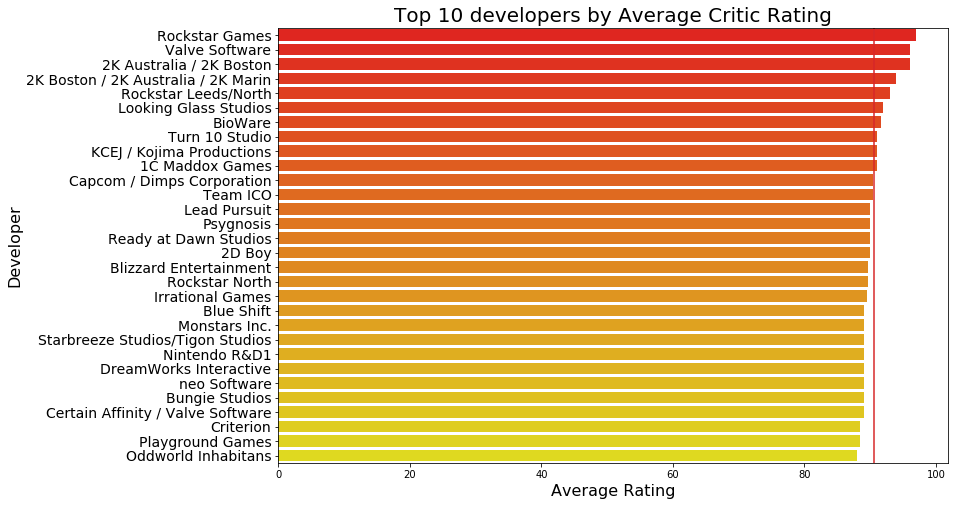

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating,rating
Developer,,,,,,,,
Rockstar Games,19710000.0,2,194,15.8,9.855000e+06,97.0,7.9,excellent
Valve Software,1960000.0,2,192,18.0,9.800000e+05,96.0,9.0,excellent
2K Australia / 2K Boston,2830000.0,1,96,8.9,2.830000e+06,96.0,8.9,excellent
2K Boston / 2K Australia / 2K Marin,1440000.0,1,94,8.8,1.440000e+06,94.0,8.8,excellent
Rockstar Leeds/North,1330000.0,1,93,8.2,1.330000e+06,93.0,8.2,excellent
Looking Glass Studios,10000.0,1,92,9.0,1.000000e+04,92.0,9.0,excellent
BioWare,5460000.0,3,275,17.5,1.820000e+06,91.7,5.8,excellent
Turn 10 Studio,4600000.0,1,91,8.2,4.600000e+06,91.0,8.2,excellent
KCEJ / Kojima Productions,4230000.0,1,91,9.1,4.230000e+06,91.0,9.1,excellent


In [48]:
data = final_data.sort_values(by='Average Critic Rating',ascending=False)
data=data[:30]
genres = data.index

colors = sns.color_palette("autumn", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Average Critic Rating', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Average Rating', fontsize=16)
ax.set_ylabel(ylabel='Developer', fontsize=16)
ax.set_title(label='Top 10 developers by Average Critic Rating', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)

mean=data['Average Critic Rating'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();
data

The above graph shows the average rating of the top 30 developers. Rockstar Games has a seriously high average rating. Congrats to them!

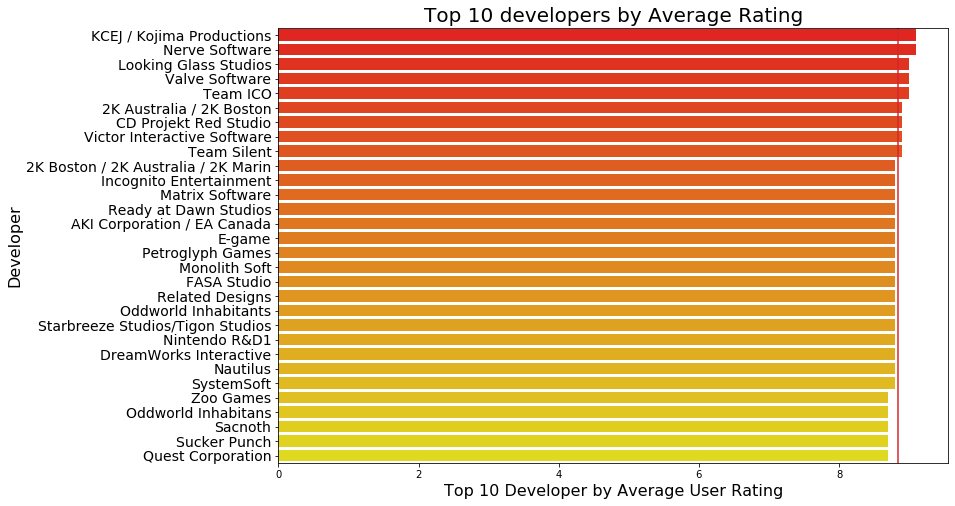

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating,rating
Developer,,,,,,,,
KCEJ / Kojima Productions,4230000.0,1,91,9.1,4.230000e+06,91.0,9.1,excellent
Nerve Software,710000.0,1,77,9.1,7.100000e+05,77.0,9.1,very good
Looking Glass Studios,10000.0,1,92,9.0,1.000000e+04,92.0,9.0,excellent
Valve Software,1960000.0,2,192,18.0,9.800000e+05,96.0,9.0,excellent
Team ICO,1610000.0,2,181,18.0,8.050000e+05,90.5,9.0,excellent
2K Australia / 2K Boston,2830000.0,1,96,8.9,2.830000e+06,96.0,8.9,excellent
CD Projekt Red Studio,8170000.0,4,352,35.6,2.042500e+06,88.0,8.9,excellent
Victor Interactive Software,320000.0,1,82,8.9,3.200000e+05,82.0,8.9,very good
Team Silent,710000.0,1,85,8.9,7.100000e+05,85.0,8.9,very good


In [49]:
data = final_data.sort_values(by='Average User Rating',ascending=False)
data=data[:30]
genres = data.index

colors = sns.color_palette("autumn", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Average User Rating', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Top 10 Developer by Average User Rating', fontsize=16)
ax.set_ylabel(ylabel='Developer', fontsize=16)
ax.set_title(label='Top 10 developers by Average Rating', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)

mean=data['Average User Rating'].mean()
ax.axvline(mean,color='tab:red')
#ax.text(15, 250000000, 'mean sales', color='tab:red',fontsize=14)

plt.show();
data

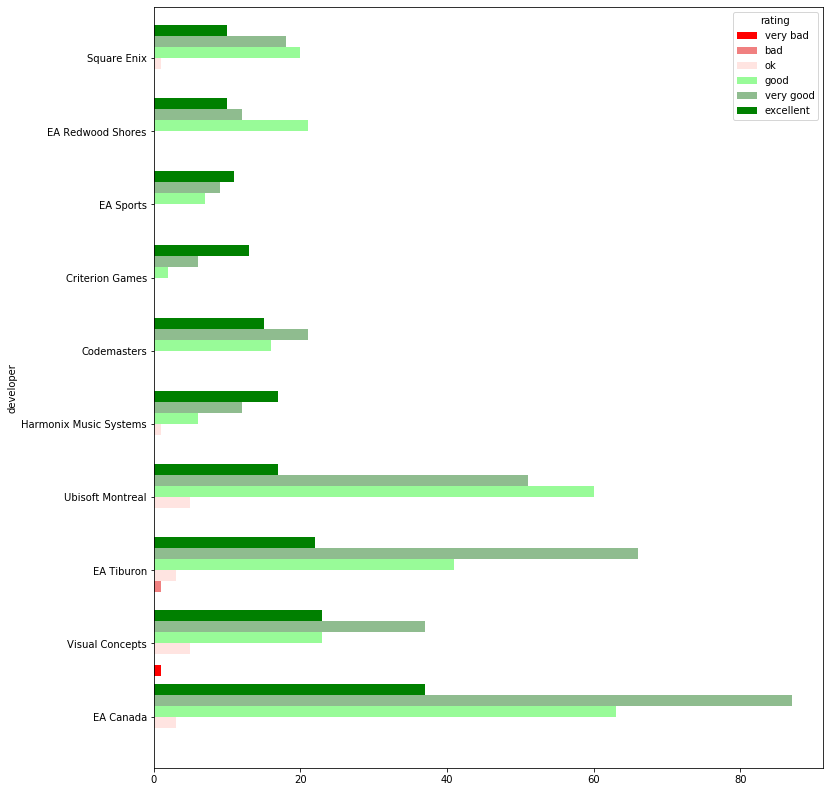

rating,very bad,bad,ok,good,very good,excellent
developer,,,,,,
EA Canada,NaN,NaN,3.0,63.0,87.0,37.0
Visual Concepts,1.0,NaN,5.0,23.0,37.0,23.0
EA Tiburon,NaN,1.0,3.0,41.0,66.0,22.0
Ubisoft Montreal,NaN,NaN,5.0,60.0,51.0,17.0
Harmonix Music Systems,NaN,NaN,1.0,6.0,12.0,17.0
Codemasters,NaN,NaN,NaN,16.0,21.0,15.0
Criterion Games,NaN,NaN,NaN,2.0,6.0,13.0
EA Sports,NaN,NaN,NaN,7.0,9.0,11.0
EA Redwood Shores,NaN,NaN,NaN,21.0,12.0,10.0


In [34]:
clone=df.copy()

replace_dict = {
        'very bad': 20, 
        'bad': 35, 
        'ok': 50, 
        'good': 75, 
        'very good': 85, 
        'excellent': 100, 
}
clone['rating'] = pd.cut(clone['meta_critic_score'],
                      bins=[1]+list(replace_dict.values()),
                      labels=list(replace_dict.keys()))

colors=sns.diverging_palette(20, 180, n=6)
clone=clone[['rating','developer','meta_critic_score']]
plat=clone.groupby(['developer','rating'])['meta_critic_score'].count().reset_index()
plat=plat.pivot('developer','rating','meta_critic_score')
plat=plat.sort_values(by='excellent',ascending=False)
data=plat.head(10)
data.plot.barh(width=0.9,color=['red','lightcoral','mistyrose','palegreen','darkseagreen','green'])
fig=plt.gcf()
fig.set_size_inches(12,14)
plt.show()
data

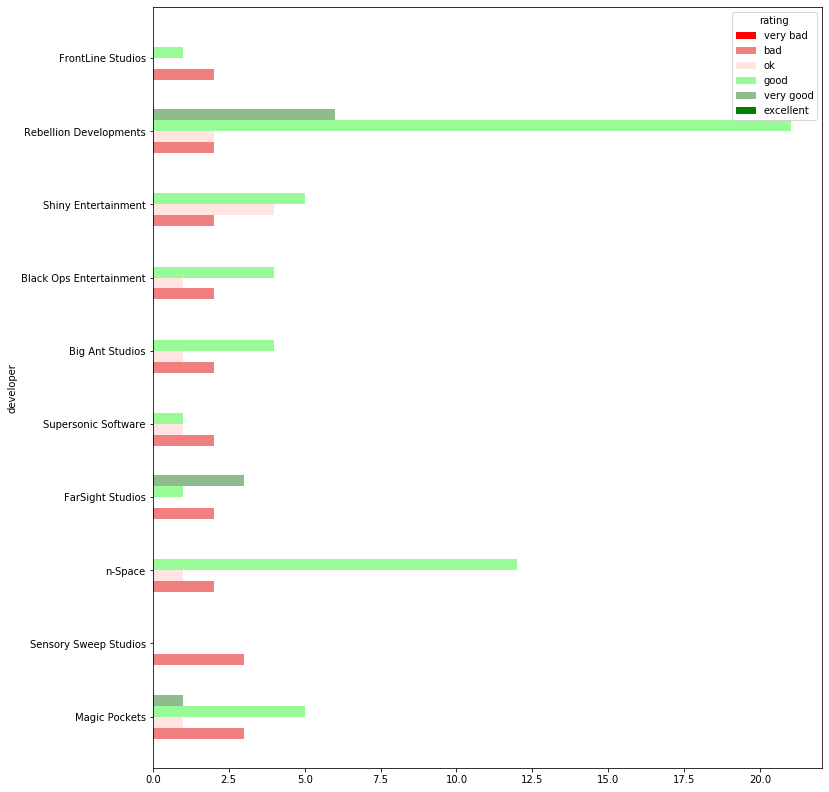

rating,very bad,bad,ok,good,very good,excellent
developer,,,,,,
Magic Pockets,NaN,3.0,1.0,5.0,1.0,NaN
Sensory Sweep Studios,NaN,3.0,NaN,NaN,NaN,NaN
n-Space,NaN,2.0,1.0,12.0,NaN,NaN
FarSight Studios,NaN,2.0,NaN,1.0,3.0,NaN
Supersonic Software,NaN,2.0,1.0,1.0,NaN,NaN
Big Ant Studios,NaN,2.0,1.0,4.0,NaN,NaN
Black Ops Entertainment,NaN,2.0,1.0,4.0,NaN,NaN
Shiny Entertainment,NaN,2.0,4.0,5.0,NaN,NaN
Rebellion Developments,NaN,2.0,2.0,21.0,6.0,NaN


In [35]:
plat=plat.sort_values(by='bad',ascending=False)
data=plat.head(10)
data.plot.barh(width=0.9,color=['red','lightcoral','mistyrose','palegreen','darkseagreen','green'])
fig=plt.gcf()
fig.set_size_inches(12,14)
plt.show()
data

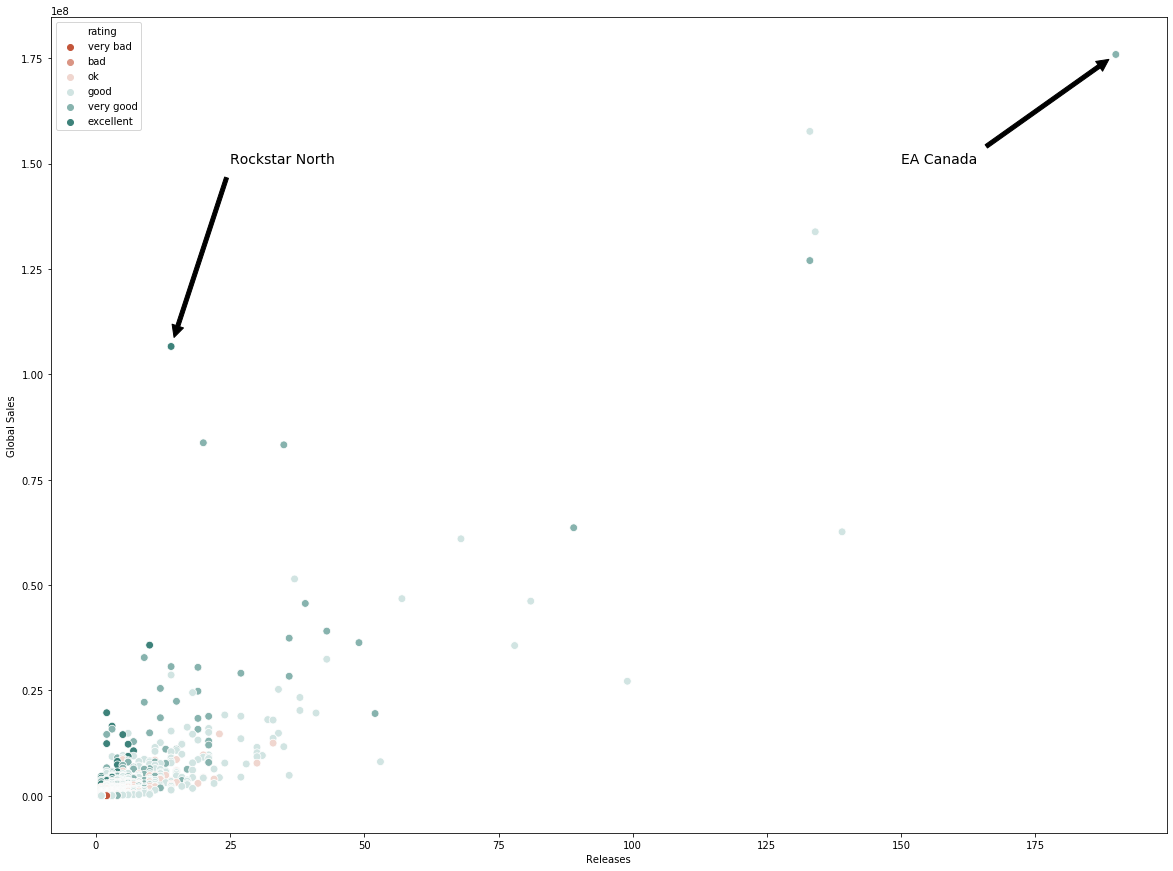

,Global Sales,Releases,Critic Rating,User Rating,Sales Per Release,Average Critic Rating,Average User Rating,rating
Developer,,,,,,,,
EA Canada,175920000.0,190,14594,1286.1,9.258947e+05,76.8,6.8,very good
Ubisoft Montreal,157670000.0,133,9730,930.2,1.185489e+06,73.2,7.0,good
Traveller's Tales,133840000.0,134,9568,971.6,9.988060e+05,71.4,7.3,good
EA Tiburon,127010000.0,133,10156,871.6,9.549624e+05,76.4,6.6,very good
Rockstar North,106630000.0,14,1255,113.9,7.616429e+06,89.6,8.1,excellent


In [43]:
data=final_data

plt.figure(figsize=(20,15))
colors=sns.diverging_palette(20, 180, n=6)
ax = sns.scatterplot(y ='Global Sales' , x = 'Releases', data=data,hue='rating',s=60,palette=colors)
ax.annotate('Rockstar North', xy=(14, 106630000.0), xytext=(25, 150000000.0),
           arrowprops=dict(facecolor='black', shrink=0.05,),fontsize=14)
ax.annotate('EA Canada', xy=(190, 175920000.0), xytext=(150, 150000000.0),
           arrowprops=dict(facecolor='black', shrink=0.05,),fontsize=14)
plt.show()
final_data.head()

### Each dot on this graph represents a developer. The colour indicated the developers average rating. This graph shows that there is a lot of very good and even excellent developers that have a low amount of sales. There does seem to be a positive correation between number of releases and sales. This suggest that you are better off making more games than trying to produce a smaller number of very high quality games.

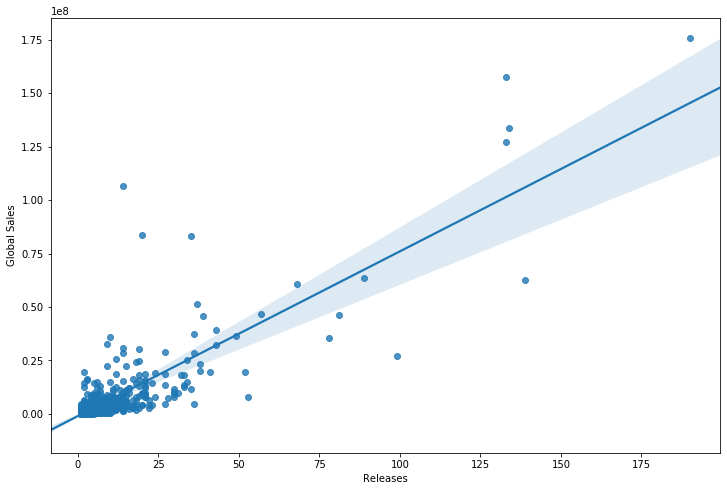

In [37]:
data = df.groupby(['developer']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
publishers = data.index
data.columns = ['Global Sales']
data2 = df.groupby(['developer']).count().iloc[:,0]
data2 = pd.DataFrame(data2)
data2.columns = ['Releases']

final_data = pd.merge(left=data, right=data2, how='left', left_on='developer', right_on='developer')

plt.figure(figsize=(12,8))
ax = sns.regplot(y ='Global Sales' , x = 'Releases', data=final_data)

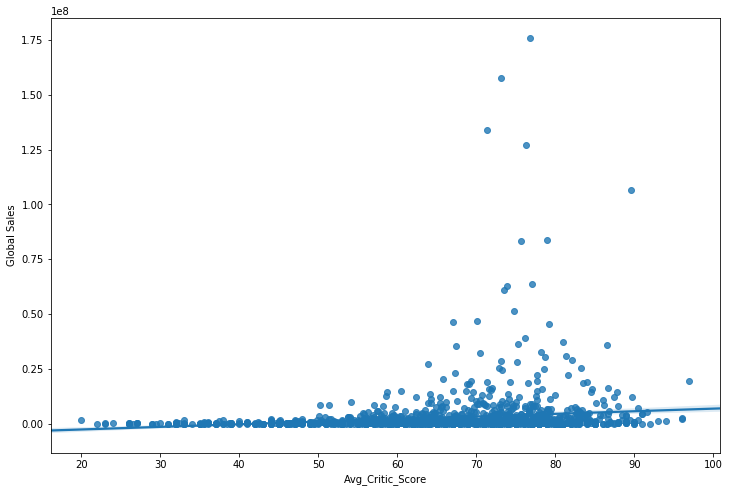

In [38]:
data = df.groupby(['developer']).sum()['global_sales']
data = pd.DataFrame(data.sort_values(ascending=False))
publishers = data.index
data.columns = ['Global Sales']
data2 = df.groupby(['developer']).mean()['meta_critic_score']
data2 = pd.DataFrame(data2)
data2.columns = ['Avg_Critic_Score']

final_data = pd.merge(left=data, right=data2, how='left', left_on='developer', right_on='developer')

plt.figure(figsize=(12,8))
ax = sns.regplot(y ='Global Sales' , x = 'Avg_Critic_Score', data=final_data)